<a href="https://colab.research.google.com/github/Sharon-Faith/status_prediction/blob/main/owns_bank_account_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> Figuring out how to predict which individuals are most likely to have or use a bank account using a dataset with information on people in Kenya, Rwanda, Tanzania, and Uganda.

### b) Defining the Metric for Success

Developing an algorithm that is able to predict which individuals are most likely to have a bank account.

### c) Understanding the context 

Financial Inclusion is one of the main obstacles to economic development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth, hence why the research question is important.

### d) Recording the Experimental Design



*   Set the main objective - predicting which individuals are most likely to have a bank account.
*   Load and preview the dataset.
*   Understand the data.
*   Prepare the dataset - Identify outliers, anomalies, duplicates and determine how deal with them, drop unnecessary columns, perform relevant datatype conversion.
*    Analyse the dataset using univariate, bivariate and multivariate analysis techniques.
*   Implement the solution.
*   Challenge the solution.
*   Follow up questions.



### e) Data Relevance

The dataset is relevant to the research question. It contains information of various individuals across Kenya, Rwanda, Tanzania, and Uganda regarding their location(urban or rural), access to cell phones, household size, marital status, relationship with head of household, gender, level of education, and type of job which are all factors that could influence whether they have a bank account or not.

## 2. Reading the Data

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [55]:
# Loading the Data 

df= pd.read_csv('Financial Dataset - 1.csv')

## 3. Checking the Data

In [56]:
# Determining the no. of records in our dataset
#
df.shape
# The dataset has 23524 rows and 13 columns

(23524, 13)

In [57]:
# Previewing the top of our dataset
#
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [58]:
# Previewing the bottom of our dataset
# 
df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [59]:
# Checking whether each column has an appropriate datatype
#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


## 4. Tidying the Dataset

In [60]:
df.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [61]:
#dropping unnecessary columns

df.drop(columns=['year', 'uniqueid'], inplace=True)


In [62]:
# Identifying missing data
#
df.isnull().sum()

country                   14
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [63]:
#Dealing with missing values
# Dropping the missing values because the values of each of the features are important
# in the analysis, and they cannot be accuractely filled in 

df.dropna(inplace=True)

In [64]:
# confirming that missing values have been dropped
df.isnull().sum()

country                   0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

In [65]:
#Checking for duplicates
df.duplicated().sum()

4372

In [66]:
df[df.duplicated()]
#duplicates will not be dropped because 2 different individuals can have the same data

,country,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
163,Kenya,No,Rural,Yes,4.0,25.0,Female,Spouse,Married/Living together,Primary education,Self employed
229,Kenya,No,Rural,No,3.0,70.0,Male,Head of Household,Married/Living together,No formal education,Farming and Fishing
321,Kenya,No,Urban,Yes,2.0,28.0,Female,Head of Household,Single/Never Married,Primary education,Self employed
482,Kenya,No,Urban,Yes,4.0,34.0,Male,Head of Household,Married/Living together,Primary education,Informally employed
599,Kenya,No,Rural,No,7.0,16.0,Female,Child,Single/Never Married,Primary education,Remittance Dependent
...,...,...,...,...,...,...,...,...,...,...,...
23447,Uganda,No,Rural,Yes,5.0,29.0,Male,Head of Household,Married/Living together,Primary education,Self employed
23477,Uganda,No,Urban,Yes,2.0,23.0,Female,Head of Household,Single/Never Married,Secondary education,Formally employed Private
23496,Uganda,No,Rural,No,1.0,60.0,Female,Head of Household,Widowed,No formal education,No Income
23505,Uganda,No,Rural,Yes,7.0,45.0,Male,Head of Household,Married/Living together,Primary education,Self employed


In [67]:
#changing categorical features to numeric values for analysis

In [68]:
# replacing the values of type of location with numerical equivalents for the purpose of analysis
print(df['Type of Location'].unique())
df['Type of Location'].replace({'Rural': 1, 'Urban':2}, inplace=True)

['Rural' 'Urban']


In [69]:
# replacing the values of cell phone access with numerical equivalents for the purpose of analysis
print(df['Cell Phone Access'].unique())
df['Cell Phone Access'].replace({'Yes': 1, 'No':2}, inplace=True)

['Yes' 'No']


In [70]:
# replacing gender values with numerical equivalents for the purpose of analysis
print(df['gender_of_respondent'].unique())
df['gender_of_respondent'].replace({'Female': 1, 'Male':2}, inplace=True)

['Female' 'Male']


In [71]:
# replacing relationship with head of household values with numerical equivalents for the purpose of analysis
print(df['The relathip with head'].unique())
df['The relathip with head'].replace({'Spouse': 1, 'Head of Household':2, 'Other relative':3, 'Child':4, 'Parent':5, 'Other non-relatives':6}, inplace=True)

['Spouse' 'Head of Household' 'Other relative' 'Child' 'Parent'
 'Other non-relatives']


In [72]:
# replacing marital status values with numerical equivalents for the purpose of analysis
print(df['marital_status'].unique())
df['marital_status'].replace({'Married/Living together': 1, 'Widowed':2, 'Single/Never Married':3, 'Divorced/Seperated':4, 'Dont know':5}, inplace=True)

['Married/Living together' 'Widowed' 'Single/Never Married'
 'Divorced/Seperated' 'Dont know']


In [73]:
print(df['Level of Educuation'].unique())


['Secondary education' 'No formal education'
 'Vocational/Specialised training' 'Primary education'
 'Tertiary education' 'Other/Dont know/RTA' '6']


In [74]:
#dropping rows with level of education = '6' because the significance of that is unknown
df = df[df['Level of Educuation'] != '6']

In [75]:
# replacing level of education values with numerical equivalents for the purpose of analysis
print(df['Level of Educuation'].unique())
df['Level of Educuation'].replace({'No formal education': 1, 'Primary education':2, 'Secondary education':3, 'Vocational/Specialised training':4, 'Tertiary education':5, 'Other/Dont know/RTA':6}, inplace=True)

['Secondary education' 'No formal education'
 'Vocational/Specialised training' 'Primary education'
 'Tertiary education' 'Other/Dont know/RTA']


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [76]:
# replacing type of job values with numerical equivalents for the purpose of analysis
print(df['Type of Job'].unique())
df['Type of Job'].replace({'Self employed': 1, 'Government Dependent':2, 'Formally employed Private':3, 'Informally employed':4, 'Formally employed Government':5, 'Farming and Fishing':6, 'Remittance Dependent':7, 'Other Income':8, 'Dont Know/Refuse to answer':9, 'No Income':10}, inplace=True)


['Self employed' 'Government Dependent' 'Formally employed Private'
 'Informally employed' 'Formally employed Government'
 'Farming and Fishing' 'Remittance Dependent' 'Other Income'
 'Dont Know/Refuse to answer' 'No Income']


In [77]:
# previewing numerical equivalents
df.head(1)

,country,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,Yes,1,1,3.0,24.0,1,1,1,3,1


In [78]:
# standardizing column names
df.columns = ['Country', 'Has a Bank Account', 'Type of Location', 'Cell Phone Access', 'Household Size', 'Respondent Age', 'Respondent Gender', 'Relationship with head', 'Marital Status','Level of Education', 'Type of Job']

In [79]:
df.head(1)

,Country,Has a Bank Account,Type of Location,Cell Phone Access,Household Size,Respondent Age,Respondent Gender,Relationship with head,Marital Status,Level of Education,Type of Job
0,Kenya,Yes,1,1,3.0,24.0,1,1,1,3,1


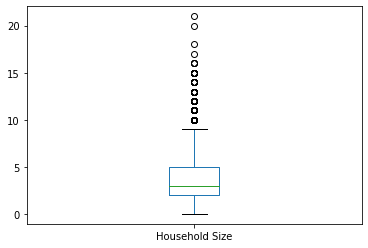

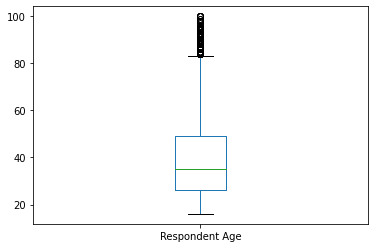

In [80]:
# Checking for Outliers in originally numerical columns
#
cols = ['Household Size', 'Respondent Age']

for col in cols:
  df.boxplot(col, grid=False)
  plt.show()

There are outliers in the household size and respondent age columns. The outliers will not be dropped because it is expected that there are individuals whose statuses in the different categories differ from the majority.

In [81]:
# Checking for Anomalies

In [82]:
# checking if any age recorded was a negative value
df[df['Respondent Age'] < 0]
# there was no negative age  

,Country,Has a Bank Account,Type of Location,Cell Phone Access,Household Size,Respondent Age,Respondent Gender,Relationship with head,Marital Status,Level of Education,Type of Job


In [83]:
#checking for anf dropping records where household size = 0, since each household should have at least one person
df = df[df['Household Size'] != 0]

## 5. Exploratory Analysis

###Univariate Analysis

In [84]:

df['Respondent Age'].describe()

count    23280.000000
mean        38.765464
std         16.474831
min         16.000000
25%         26.000000
50%         35.000000
75%         49.000000
max        100.000000
Name: Respondent Age, dtype: float64

* The mean age reperesented in the dataset is approximately 38
* The standard deviation for age is approximately 16
* The minimum age is 16
* The first quartile is age 26 
* The median is age 35
* The third quartile is age 49
* The maximum age represented is 100

In [85]:
#range of age
df['Respondent Age'].max() - df['Respondent Age'].min()

84.0

In [86]:

df['Respondent Age'].kurt()
# the kurtosis is close to 0, which is for a normal distribution

0.0953368515789399

In [87]:
df['Respondent Age'].skew()
# the data is moderately positively skewed (to the right)

0.8388653119192585

Text(0, 0.5, 'Frequency')

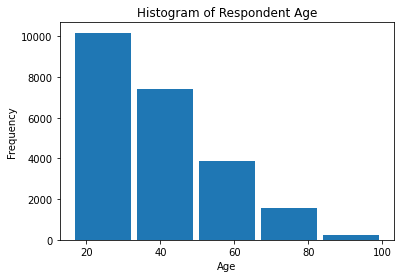

In [88]:
df['Respondent Age'].hist(grid=False, bins= 5, rwidth=0.9)

plt.title('Histogram of Respondent Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

In [89]:
bin_width = (df['Respondent Age'].max() - df['Respondent Age'].min())/5
lower_lim = int(df['Respondent Age'].min())
upper_lim = int(df['Respondent Age'].min() +bin_width*1)
print(f'Most respondents were aged between {lower_lim} to {upper_lim}')

Most respondents were aged between 16 to 32


In [90]:
df['Household Size'].describe()

count    23280.000000
mean         3.694201
std          2.277893
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         21.000000
Name: Household Size, dtype: float64

* The mean household size reperesented in the dataset is approximately 3
* The standard deviation for household size is approximately 2
* The minimum household size is 1
* The first quartile is a household size of 2 
* The median is a household size of 3
* The third quartile is a household size 5
* The maximum household size represented is 21

In [91]:
# range of household size
df['Household Size'].max() - df['Household Size'].min()

20.0

In [92]:
df['Household Size'].kurt()
# it is leptokurtic

1.1599104517805614

In [93]:
df['Household Size'].skew()
# it is moderately positively skewed

0.9779589032417252

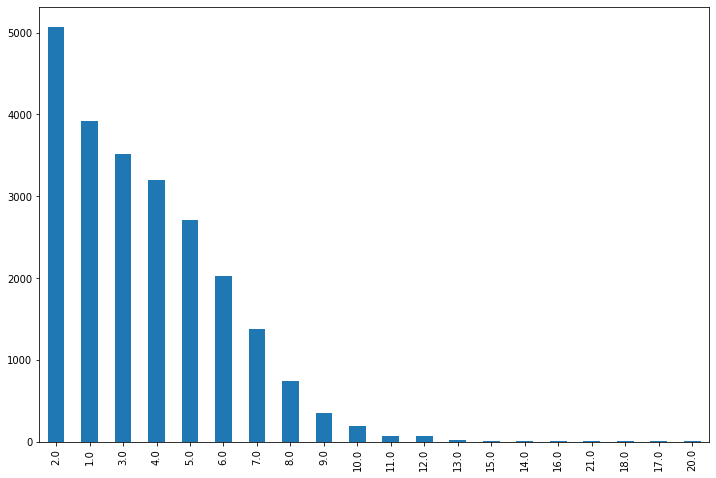

In [94]:
df['Household Size'].value_counts().plot.bar()
plt.gcf().set_size_inches(12,8)

The most represented household size is 2

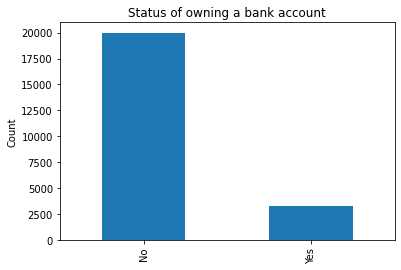

In [95]:
df['Has a Bank Account'].value_counts().plot.bar()
plt.title('Status of owning a bank account')
plt.ylabel('Count')
plt.show()

Most respondents did not have a bank account at the time of the survey.

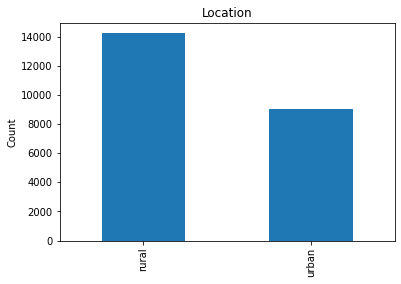

In [96]:
#Type of Location: 'Rural': 1, 'Urban':2
df['Type of Location'].value_counts().plot.bar()
plt.title('Location')
plt.xticks(ticks=[0, 1], labels=['rural', 'urban'])
plt.ylabel('Count')
plt.show()

Most respondents lived in rural areas

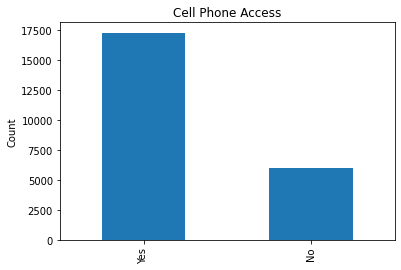

In [97]:
# Cell Phone Access = 'Yes': 1, 'No':2
df['Cell Phone Access'].value_counts().plot.bar()
plt.title('Cell Phone Access')
plt.xticks(ticks=[0, 1], labels=['Yes', 'No'])
plt.ylabel('Count')
plt.show()

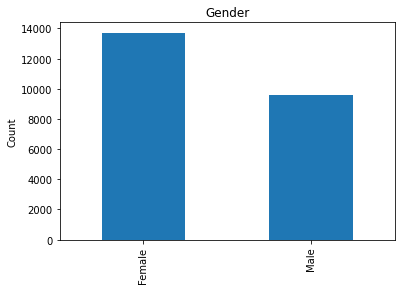

In [98]:
# gender 'Female': 1, 'Male':2
df['Respondent Gender'].value_counts().plot.bar()
plt.title('Gender')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.ylabel('Count')
plt.show()

Most respondents were female

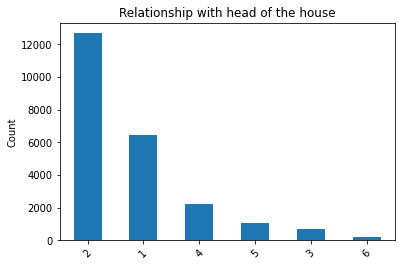

In [99]:
#The relationship with head' 'Spouse': 1, 'Head of Household':2, 'Other relative':3, 'Child':4, 'Parent':5, 'Other non-relatives':6
df['Relationship with head'].value_counts().plot.bar()
plt.title('Relationship with head of the house')
plt.xticks(rotation = 45)
plt.ylabel('Count')
plt.show()

Spouse: 1, Head of Household: 2, Other relative: 3, Child: 4, Parent: 5, Other non-relatives: 6

Most respondents were the head of the household

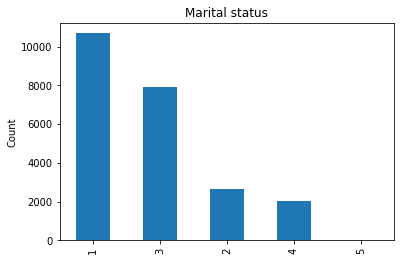

In [100]:
# marital_status 'Married/Living together': 1, 'Widowed':2, 'Single/Never Married':3, 'Divorced/Seperated':4, 'Dont know':5

df['Marital Status'].value_counts().plot.bar()
plt.title('Marital status')

plt.ylabel('Count')
plt.show()

Married/Living together: 1, Widowed:2, Single/Never Married:3, Divorced/Seperated:4, Dont know:5

Most respondents were married

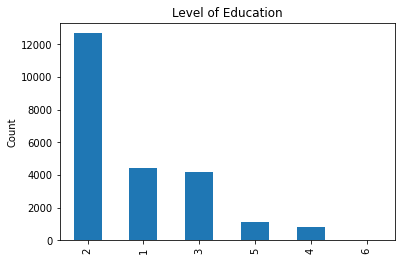

In [101]:
#Level of education: 'No formal education': 1, 'Primary education':2, 'Secondary education':3, 
#'Vocational/Specialised training':4, 'Tertiary education':5, 'Other/Dont know/RTA':6

df['Level of Education'].value_counts().plot.bar()
plt.title('Level of Education')

plt.ylabel('Count')
plt.show()

No formal education: 1, Primary education:2, Secondary education:3, Vocational/Specialised training:4, Tertiary education:5, Other/Dont know/RTA:6

Primary education was the most common level of education attained among respondents.

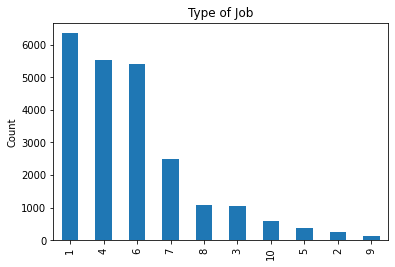

In [102]:
#Type of Job: 'Self employed': 1, 'Government Dependent':2, 'Formally employed Private':3, 'Informally employed':4, 'Formally employed Government':5, 'Farming and Fishing':6, 
#'Remittance Dependent':7, 'Other Income':8, 'Dont Know/Refuse to answer':9, 'No Income':10
df['Type of Job'].value_counts().plot.bar()
plt.title('Type of Job')

plt.ylabel('Count')
plt.show()

Self employed: 1, Government Dependent:2, Formally employed Private:3, Informally employed:4, Formally employed Government:5, Farming and Fishing:6, 
Remittance Dependent:7, Other Income:8, Dont Know/Refuse to answer:9, No Income:10

Self employed was the most common type of job among respondents.

### Bivariate analysis

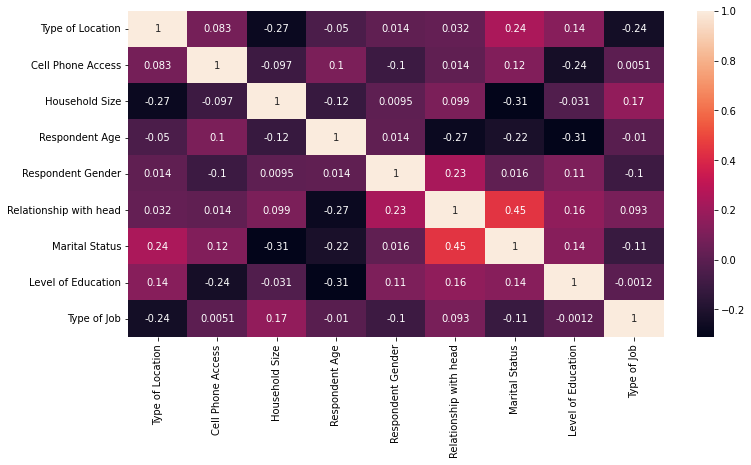

In [103]:
sns.heatmap(df.corr(),annot=True)
plt.gcf().set_size_inches(12,6)
plt.show()

* The is moderate correlation between marital status and relationship with head of household.
* Most of the variables have weak or very weak positive or negative linear correlation with each otehr.

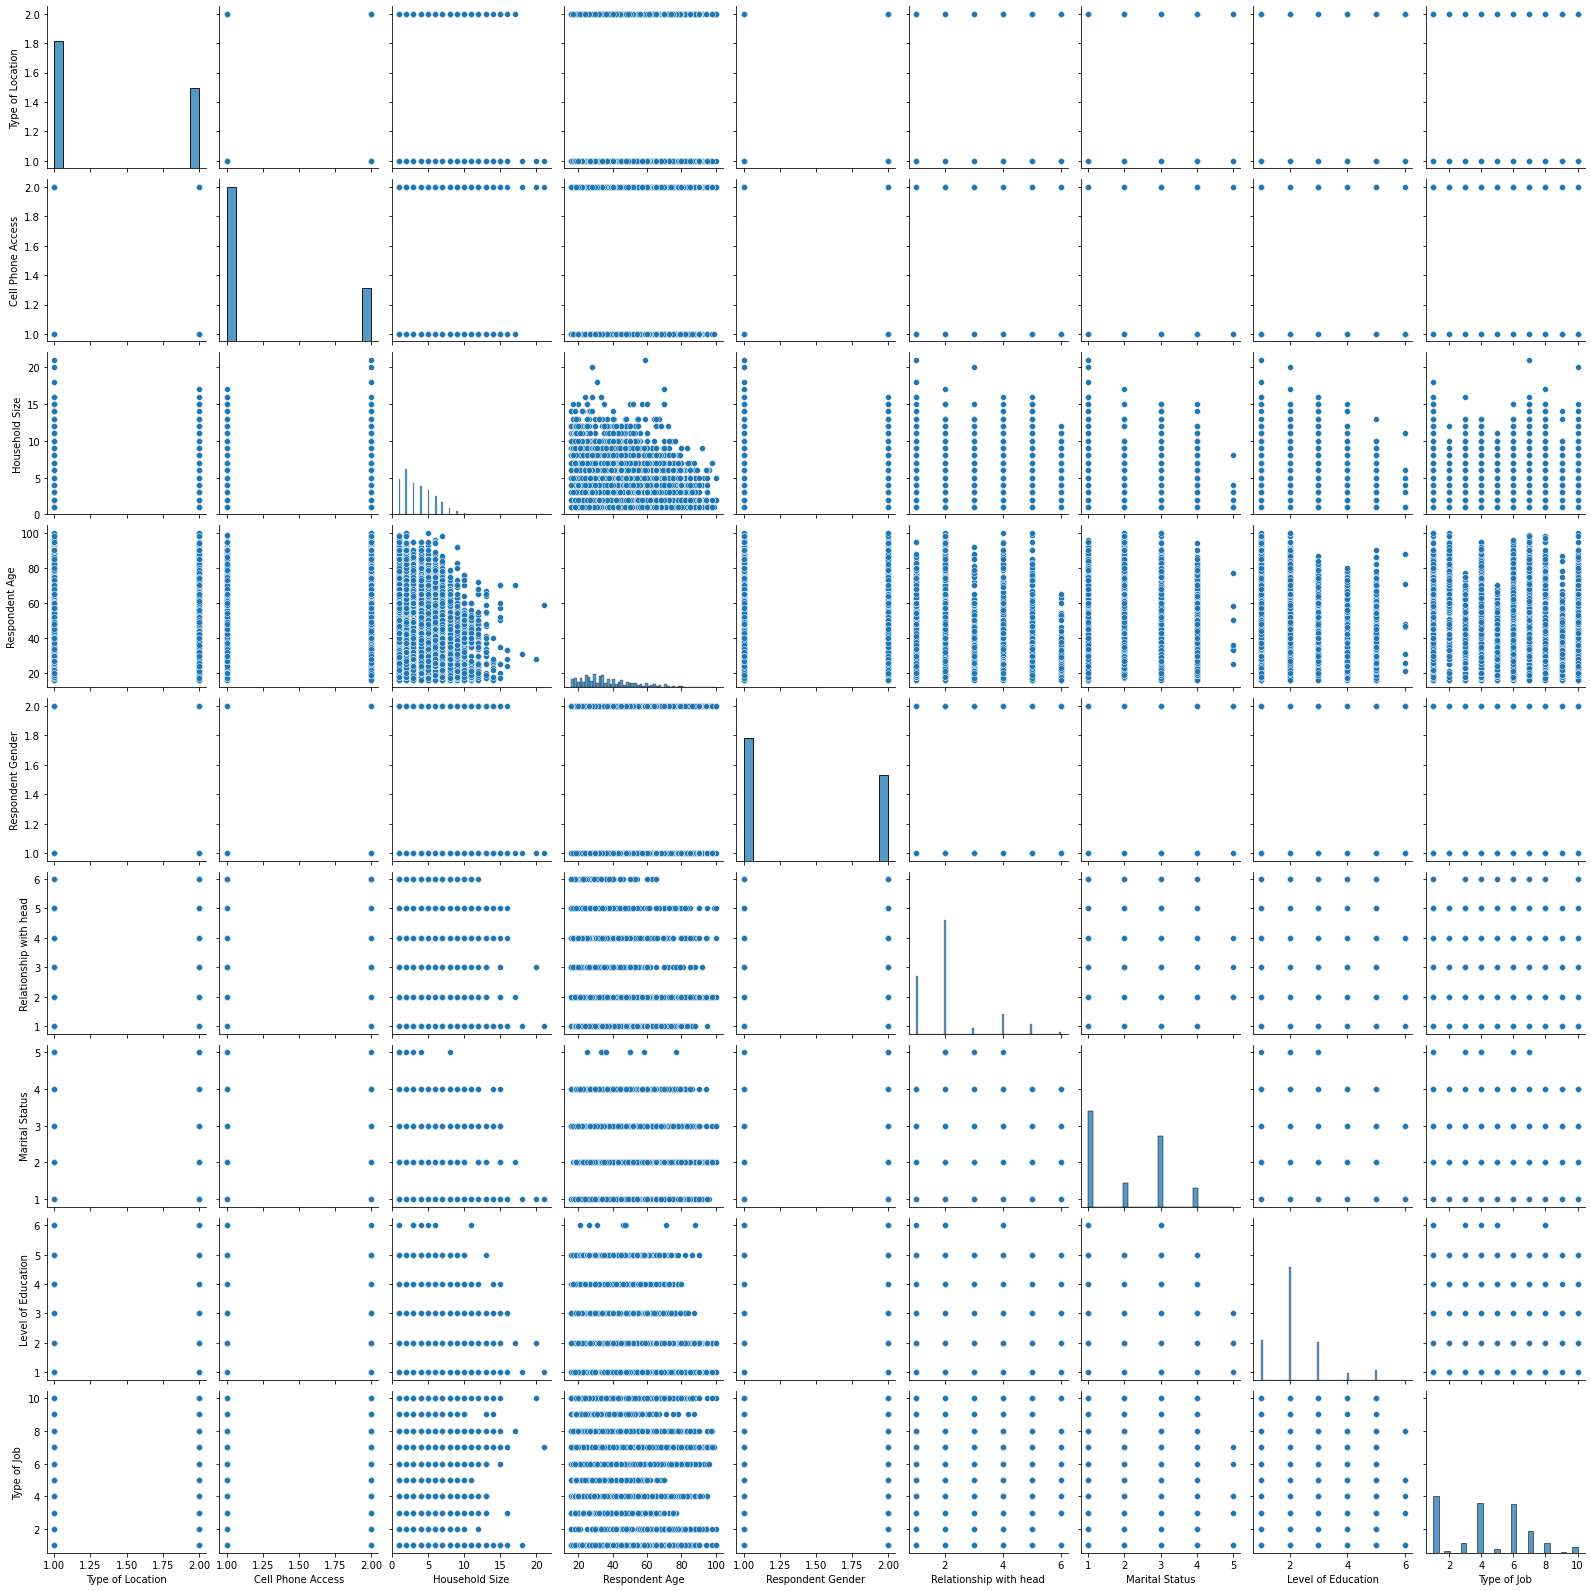

In [104]:
# Ploting the bivariate summaries and recording our observations
#
sns.pairplot(df)
plt.show()

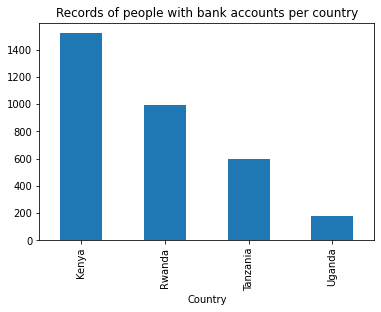

In [105]:
# Number with bank accounts per country
df_by_loc = df[df['Has a Bank Account'] == 'Yes'].groupby('Country')['Has a Bank Account'].count()
df_by_loc.reset_index()
df_by_loc.plot.bar(x='Country', y='Has a Bank Account')
plt.title('Records of people with bank accounts per country')
plt.show()

Most respondents with a bank account were in Kenya

In [106]:
df_loc = df.groupby('Country')['Country'].count().nlargest()
df_loc
# Most records are from Rwanda although Kenya shows highest number of people with a bank account

Country
Rwanda      8666
Tanzania    6461
Kenya       6064
Uganda      2089
Name: Country, dtype: int64

### Multivariate Analysis

In [107]:
df.columns

Index(['Country', 'Has a Bank Account', 'Type of Location',
       'Cell Phone Access', 'Household Size', 'Respondent Age',
       'Respondent Gender', 'Relationship with head', 'Marital Status',
       'Level of Education', 'Type of Job'],
      dtype='object')

In [108]:
# Data Reduction
#PCA - Principal component analysis
#splitting dataset to features and label
X = df.drop(['Country', 'Has a Bank Account'], axis=1)
y = df['Has a Bank Account']

In [109]:
X.head(1)

,Type of Location,Cell Phone Access,Household Size,Respondent Age,Respondent Gender,Relationship with head,Marital Status,Level of Education,Type of Job
0,1,1,3.0,24.0,1,1,1,3,1


In [110]:
y

0        Yes
1         No
2        Yes
3         No
4         No
        ... 
23519     No
23520     No
23521     No
23522     No
23523     No
Name: Has a Bank Account, Length: 23280, dtype: object

In [111]:
#Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [112]:
# Normalization of the feature set

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [113]:
# Applying PCA using Python's Scikit-Learn library. 

# Initializing the PCA class without specifying the number of components in the constructor
# so all features in the feature set will be returned for both the training and test sets.
# 
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [114]:
# Returning the variance caused by each of the principal components. 
# 
explained_variance = pca.explained_variance_ratio_

 
# The proportions of the classification information contained 
# in the feature set captured by the different principal components is shown in the array,
#  with principal component 1 capturing the most (21.41% of the info).
explained_variance

array([0.21419642, 0.17697942, 0.13560819, 0.11850733, 0.09542354,
       0.08246292, 0.07245087, 0.0632937 , 0.04107761])

###  Implementing the Solution 

In [115]:
#using one principal component to train model
pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [116]:
# Making predictions using random forest classification
# 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [117]:
#performance evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

# Using one principal component, the random forest algorithm is able to correctly predict the, 
# bank status of an individual with in 85.67% accuracy.

[[3989    0]
 [ 667    0]]
Accuracy 0.8567439862542955


In [118]:
# Results with all Principal Components

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))
# While using all principal components for the model, the accuracy is still 85.67%

[[3989    0]
 [ 667    0]]
Accuracy 0.8567439862542955


## 6. Challenging the solution

Using the principal component analysis approach, the bank status of an individual was able to be predicted with 85.67% accuracy. We want to see if a better level of accuracy will be achieved with linear discriminant analysis

In [119]:
# spliting the dataset to train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Performing feature scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#implementing LDA (linear discriminant analysis)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

#training and making predictions using the random forest classifier 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

#performance evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))
# With one linear discriminant, the accuracy achieved is 86.75%

[[3920   69]
 [ 548  119]]
Accuracy0.8674828178694158


With one linear discriminant, the algorithm achieved an accuracy of 86.75%, which is greater than the accuracy achieved with one principal component, which was 85.67%. We would therefore recommend using linear discrimant analysis over principal component analysis for predicting the bank status.

## 9. Follow up questions

### a). Did we have the right data?

Yes, the data we had with information of various individuals across Kenya, Rwanda, Tanzania, and Uganda regarding their location(urban or rural), access to cell phones, household size, marital status, relationship with head of household, gender, level of education, and type of job helped develop the prediction algorithm.

### b). Do we need other data to answer our question?

Other data like land/property ownership, amount of income etc might help in improving the accuracy of the algorithm.

### c). Did we have the right question?

Yes, the question was okay, as financial inclusion is a big issue in Africa.